<a href="https://colab.research.google.com/github/ugurkaymaz/ugur/blob/master/Workshop%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== BUILDING SEMANTIC NETWORK ===

Adding concept nodes:
 - Node added: Animal
 - Node added: Mammal
 - Node added: Bird
 - Node added: Reptile
 - Node added: Dog
 - Node added: Cat
 - Node added: Eagle
 - Node added: Penguin
 - Node added: Snake
 - Node added: Lizard
 - Node added: hasWing
 - Node added: hasFur
 - Node added: canFly
 - Node added: hasScales
 - Node added: hasTail
 - Node added: laysEggs
 - Node added: isDangerous

Adding edges (relationships):
 - Animal → Mammal
 - Animal → Bird
 - Animal → Reptile
 - Mammal → Dog
 - Mammal → Cat
 - Bird → Eagle
 - Bird → Penguin
 - Reptile → Snake
 - Reptile → Lizard
 - Bird → hasWing
 - Mammal → hasFur
 - Eagle → canFly
 - Reptile → hasScales


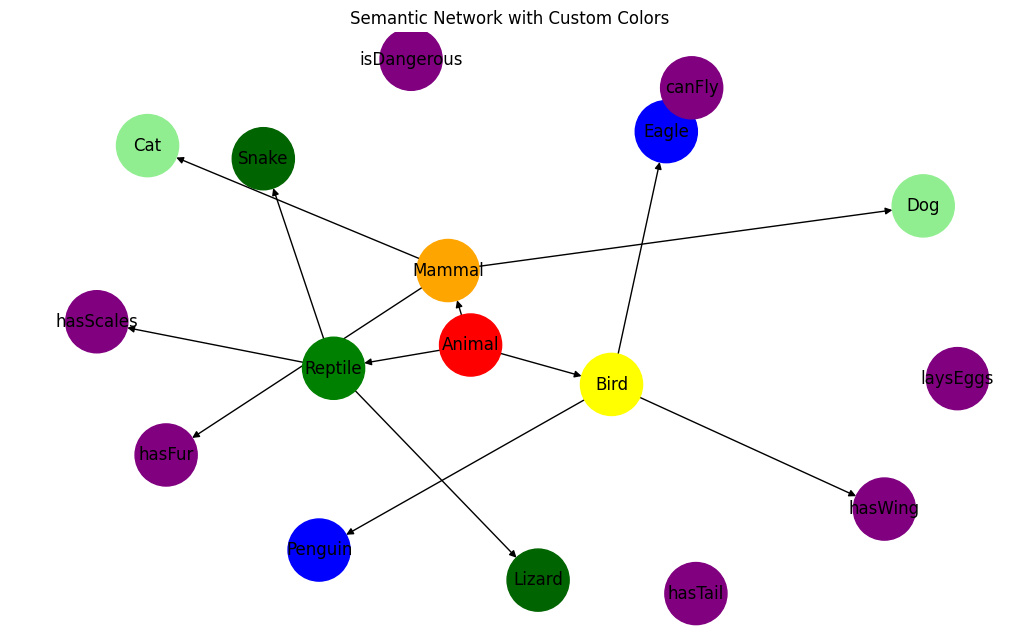


Network built successfully!
Nodes: ['Animal', 'Mammal', 'Bird', 'Reptile', 'Dog', 'Cat', 'Eagle', 'Penguin', 'Snake', 'Lizard', 'hasWing', 'hasFur', 'canFly', 'hasScales', 'hasTail', 'laysEggs', 'isDangerous']
Edges: [('Animal', 'Mammal'), ('Animal', 'Bird'), ('Animal', 'Reptile'), ('Mammal', 'Dog'), ('Mammal', 'Cat'), ('Mammal', 'hasFur'), ('Bird', 'Eagle'), ('Bird', 'Penguin'), ('Bird', 'hasWing'), ('Reptile', 'Snake'), ('Reptile', 'Lizard'), ('Reptile', 'hasScales'), ('Eagle', 'canFly')]

=== INHERITANCE REASONING ===

All ancestors (superclasses) of Eagle: {'Animal', 'Bird'}

Does Penguin inherit from Animal?
All ancestors (superclasses) of Penguin: {'Animal', 'Bird'}
Answer: True

What properties does Eagle inherit?
Inherited properties: {'hasWing', 'canFly'}

=== BUILDING RDF ONTOLOGY IN RDFLIB ===

Adding OWL/RDFS Classes:
 - Class created: Animal
 - Class created: Mammal
 - Class created: Bird
 - Class created: Reptile
 - Class created: Dog
 - Class created: Cat
 - Class creat

In [23]:
# -*- coding: utf-8 -*-


#Install Required Libraries
!pip install networkx matplotlib rdflib

# **Build a Simple Semantic Network**"""

# Install Required Libraries
#!pip install networkx matplotlib rdflib

import networkx as nx
import matplotlib.pyplot as plt

print("\n=== BUILDING SEMANTIC NETWORK ===\n")

G = nx.DiGraph()

# Add concept nodes
concepts = [
    "Animal", "Mammal", "Bird", "Reptile",
    "Dog", "Cat", "Eagle", "Penguin", "Snake", "Lizard",
    "hasWing", "hasFur", "canFly", "hasScales", "hasTail", "laysEggs", "isDangerous"
]

print("Adding concept nodes:")
for c in concepts:
    print(" - Node added:", c)
G.add_nodes_from(concepts)

# Add edges (relationships)
# Original edges had (child, parent) for inheritance which caused issues with nx.ancestors.
# To find superclasses using nx.ancestors, edges must be (parent, child).
# Property relationships (subject, property_node) remain the same.
graph_edges = [
    # Inheritance relationships: (parent, child)
    ("Animal", "Mammal"),
    ("Animal", "Bird"),
    ("Animal", "Reptile"),
    ("Mammal", "Dog"),
    ("Mammal", "Cat"),
    ("Bird", "Eagle"),
    ("Bird", "Penguin"),
    ("Reptile", "Snake"),
    ("Reptile", "Lizard"),
    # Property relationships: (subject, property_node)
    ("Bird", "hasWing"),
    ("Mammal", "hasFur"),
    ("Eagle", "canFly"),
    ("Reptile", "hasScales")
]

print("\nAdding edges (relationships):")
for u, v in graph_edges: # Use u, v to represent general nodes
    print(f" - {u} \u2192 {v}")
G.add_edges_from(graph_edges)

# Define colors for different types of nodes for better visualization
node_colors = {
    "Animal": "red",
    "Mammal": "orange",
    "Bird": "yellow",
    "Reptile": "green",
    "Dog": "lightgreen",
    "Cat": "lightgreen",
    "Eagle": "blue",
    "Penguin": "blue",
    "Snake": "darkgreen",
    "Lizard": "darkgreen",
    "hasWing": "purple",
    "hasFur": "purple",
    "canFly": "purple",
    "hasScales": "purple",
    "hasTail": "purple",
    "laysEggs": "purple",
    "isDangerous": "purple"
}

# Create a list of colors for the nodes based on their type
color_map = [node_colors.get(node, "grey") for node in G.nodes()]

# Draw network with custom node colors
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=2000)
plt.title("Semantic Network with Custom Colors")
plt.show()

print("\nNetwork built successfully!")
print("Nodes:", G.nodes())
print("Edges:", G.edges())

"""**Function for Inheritance Reasoning**

Questions:

Does Penguin inherit from Animal?

List all inherited properties (e.g., wing, fly).
"""

print("\n=== INHERITANCE REASONING ===\n")

def get_ancestors(graph, node):
    ancestors = nx.ancestors(graph, node)
    print(f"All ancestors (superclasses) of {node}: {ancestors}")
    return ancestors

# New function to get all properties inherited by a node
def get_inherited_properties(graph, node):
    # Get the node itself and its ancestors (superclasses)
    relevant_nodes = set([node])
    relevant_nodes.update(nx.ancestors(graph, node)) # ancestors are now superclasses due to graph_edges direction

    inherited_props = set()
    for n in relevant_nodes:
        # Find all outgoing edges from n where the target node is a property
        # Assuming property nodes are identifiable (e.g., by "has" or "can" prefix)
        for _, prop_node in graph.out_edges(n):
            if "has" in prop_node or "can" in prop_node or "lays" in prop_node or "is" in prop_node: # Include new property prefixes
                inherited_props.add(prop_node)
    return inherited_props


# Example: Eagle inheritance
get_ancestors(G, "Eagle")

# Student Tasks
print("\nDoes Penguin inherit from Animal?")
# 'Animal' is an ancestor of 'Penguin' if the graph edges are (parent, child)
print("Answer:", "Animal" in get_ancestors(G, "Penguin"))

print("\nWhat properties does Eagle inherit?")
# Modified to use the new get_inherited_properties function
eagle_props = get_inherited_properties(G, "Eagle")
print("Inherited properties:", eagle_props)

"""### **Build an Ontology in RDFLib**"""

print("\n=== BUILDING RDF ONTOLOGY IN RDFLIB ===\n")

from rdflib import Graph, Namespace, RDF, RDFS, Literal

g = Graph()
EX = Namespace("http://example.org/animal#")
g.bind("ex", EX)

# Add Classes
print("Adding OWL/RDFS Classes:")
# Use 'concepts' list to define classes, as 'classes' was undefined.
for c in concepts:
    print(f" - Class created: {c}")
    g.add((EX[c], RDF.type, RDFS.Class))

# Add Subclass relationships
print("\nAdding subclass relationships (rdfs:subClassOf):")
# The variable 'relations' is also undefined. Based on the semantic network, 'edges' contains these relationships.
# However, 'edges' contains relationships like ('Bird', 'hasWing') which are properties, not subclass relationships.
# We need to filter 'edges' to only include class-subclass relationships for RDFS.subClassOf
# Let's define `relations` based on the relevant `edges` for subClassOf.
relations = [
    ("Mammal", "Animal"),
    ("Bird", "Animal"),
    ("Reptile", "Animal"),
    ("Dog", "Mammal"),
    ("Cat", "Mammal"),
    ("Eagle", "Bird"),
    ("Penguin", "Bird"),
    ("Snake", "Reptile"),
    ("Lizard", "Reptile")
]

for child, parent in relations:
    print(f" - {child} \u2291 {parent}")
    g.add((EX[child], RDFS.subClassOf, EX[parent]))

# Add properties
print("\nAdding properties:")
properties = ["hasWing", "hasFur", "canFly", "hasScales", "hasTail", "laysEggs", "isDangerous"]
for p in properties:
    print(f" - Property added: {p}")
    g.add((EX[p], RDF.type, RDF.Property))

# Attach property values
print("\nAttaching property values to classes:")
property_values = [
    ("Bird", "hasWing", True),
    ("Mammal", "hasFur", True),
    ("Eagle", "canFly", True),
    ("Penguin", "canFly", False),
    ("Reptile", "hasScales", True),
    ("Reptile", "laysEggs", True),
    ("Snake", "isDangerous", True)
]

for cls, prop, val in property_values:
    print(f" - {cls} \u2192 {prop} = {val}")
    g.add((EX[cls], EX[prop], Literal(val)))

print("\nTotal ontology triples:", len(g))

"""**Querying and Reasoning (SPARQL)**"""

print("\n=== SPARQL QUERIES ===\n")

print("Query 1: All subclasses of Animal")
q1 = """
SELECT ?x WHERE { ?x rdfs:subClassOf ex:Animal . }
"""
for row in g.query(q1, initNs={"ex": EX, "rdfs": RDFS}):
    print(" -", row.x)

print("\nQuery 2: All animals that can fly:")
q2 = """
SELECT ?animal WHERE { ?animal ex:canFly true . }
"""

for row in g.query(q2, initNs={"ex": EX}):
    print(" -", row.animal)

print("\nQuery 3: All dangerous animals:")
q3 = """
SELECT ?x WHERE { ?x ex:isDangerous true . }
"""

for row in g.query(q3, initNs={"ex": EX}):
    print(" -", row.x)

"""Write a Python function that:

If A subclassOf B and B subclassOf C \u2192 infer A subclassOf C

Output all indirect superclass relationships.
"""

print("\n=== MANUAL INFERENCE: INDIRECT SUPERCLASSES ===\n")

def infer_superclasses(graph):
    inferred = []
    for c1, _, c2 in graph.triples((None, RDFS.subClassOf, None)):
        for c3, _, c4 in graph.triples((c2, RDFS.subClassOf, None)):
            if c1 != c4:
                print(f"Inferred: {c1.split('#')[-1]} \u2291 {c4.split('#')[-1]}")
                inferred.append((c1, RDFS.subClassOf, c4))
    return inferred

inferred_results = infer_superclasses(g)
print("\nTotal inferred relationships:", len(inferred_results))

### **Visualize RDF Graph**

In [9]:
# Install libraries for graph visualization
!pip install pydotplus graphviz

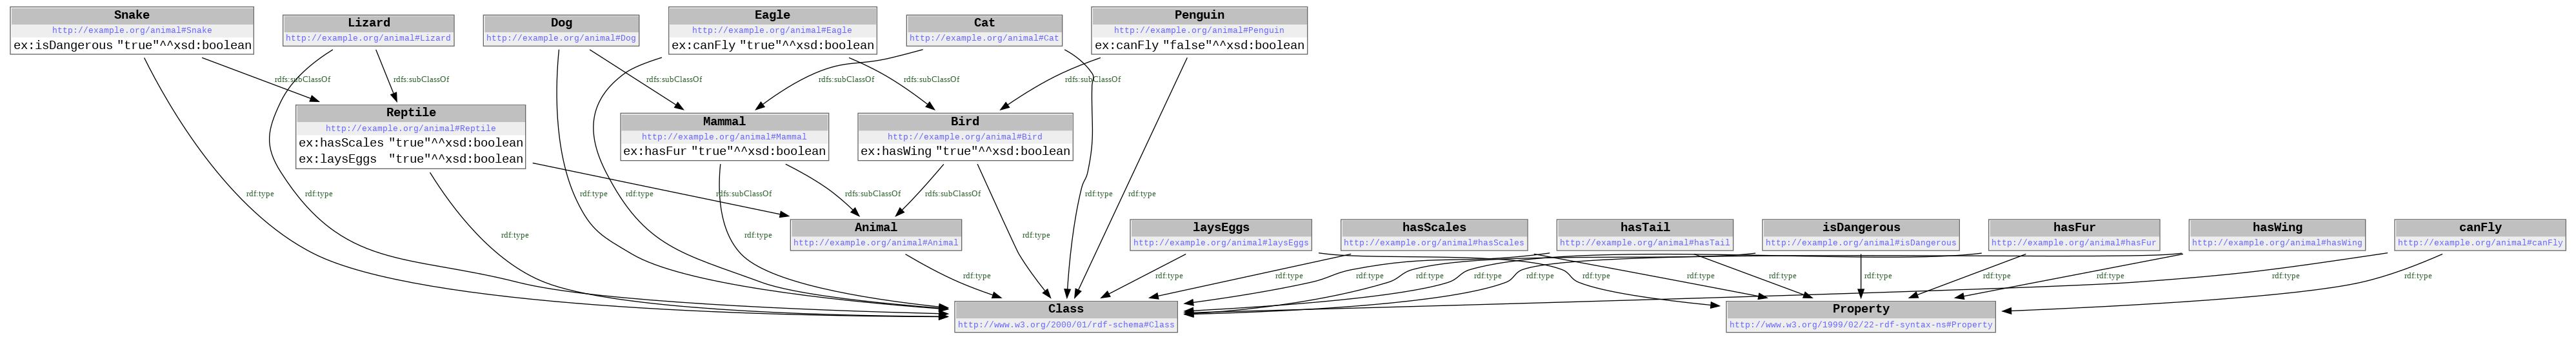

In [16]:
import pydotplus
from IPython.display import Image
from rdflib.tools import rdf2dot
import io

# Create a dot graph object
dot_graph = io.StringIO()
rdf2dot.rdf2dot(g, dot_graph)
dot_graph = pydotplus.graph_from_dot_data(dot_graph.getvalue())

# Render the graph and display it
Image(dot_graph.create_png())

### **RDF Triples in Turtle Format**

In [12]:
# Serialize the RDF graph to Turtle format and print it
print(g.serialize(format='turtle'))

@prefix ex: <http://example.org/animal#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:Animal a rdfs:Class .

ex:Bird a rdfs:Class ;
    ex:hasWing true ;
    rdfs:subClassOf ex:Animal .

ex:Cat a rdfs:Class ;
    rdfs:subClassOf ex:Mammal .

ex:Dog a rdfs:Class ;
    rdfs:subClassOf ex:Mammal .

ex:Eagle a rdfs:Class ;
    ex:canFly true ;
    rdfs:subClassOf ex:Bird .

ex:Lizard a rdfs:Class ;
    rdfs:subClassOf ex:Reptile .

ex:Mammal a rdfs:Class ;
    ex:hasFur true ;
    rdfs:subClassOf ex:Animal .

ex:Penguin a rdfs:Class ;
    ex:canFly false ;
    rdfs:subClassOf ex:Bird .

ex:Reptile a rdfs:Class ;
    ex:hasScales true ;
    rdfs:subClassOf ex:Animal .

ex:Snake a rdfs:Class ;
    rdfs:subClassOf ex:Reptile .

ex:canFly a rdf:Property,
        rdfs:Class .

ex:hasFur a rdf:Property,
        rdfs:Class .

ex:hasScales a rdf:Property,
        rdfs:Cl

In [18]:
# **Selecting Specifc Heads**

import requests
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Fetch and extract headers
# -----------------------------
url = "https://www.bbc.co.uk/news/articles/cdd57e924meo"  # any article URL
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

# Extract all header tags
headers = {
    "H1": [h.get_text(strip=True) for h in soup.find_all("h1")],
    "H2": [h.get_text(strip=True) for h in soup.find_all("h2")]
}

print("Extracted Headers:")
for level, items in headers.items():
    print(f"\n{level}:")
    for text in items:
        print("-", text)

Extracted Headers:

H1:
- Second MP quits new left-wing Your Party group

H2:
- Related topics
- Top stories
- More to explore
- Elsewhere on the BBC
- Most read
- BBC News Services


### **Visualize Extracted Headers**

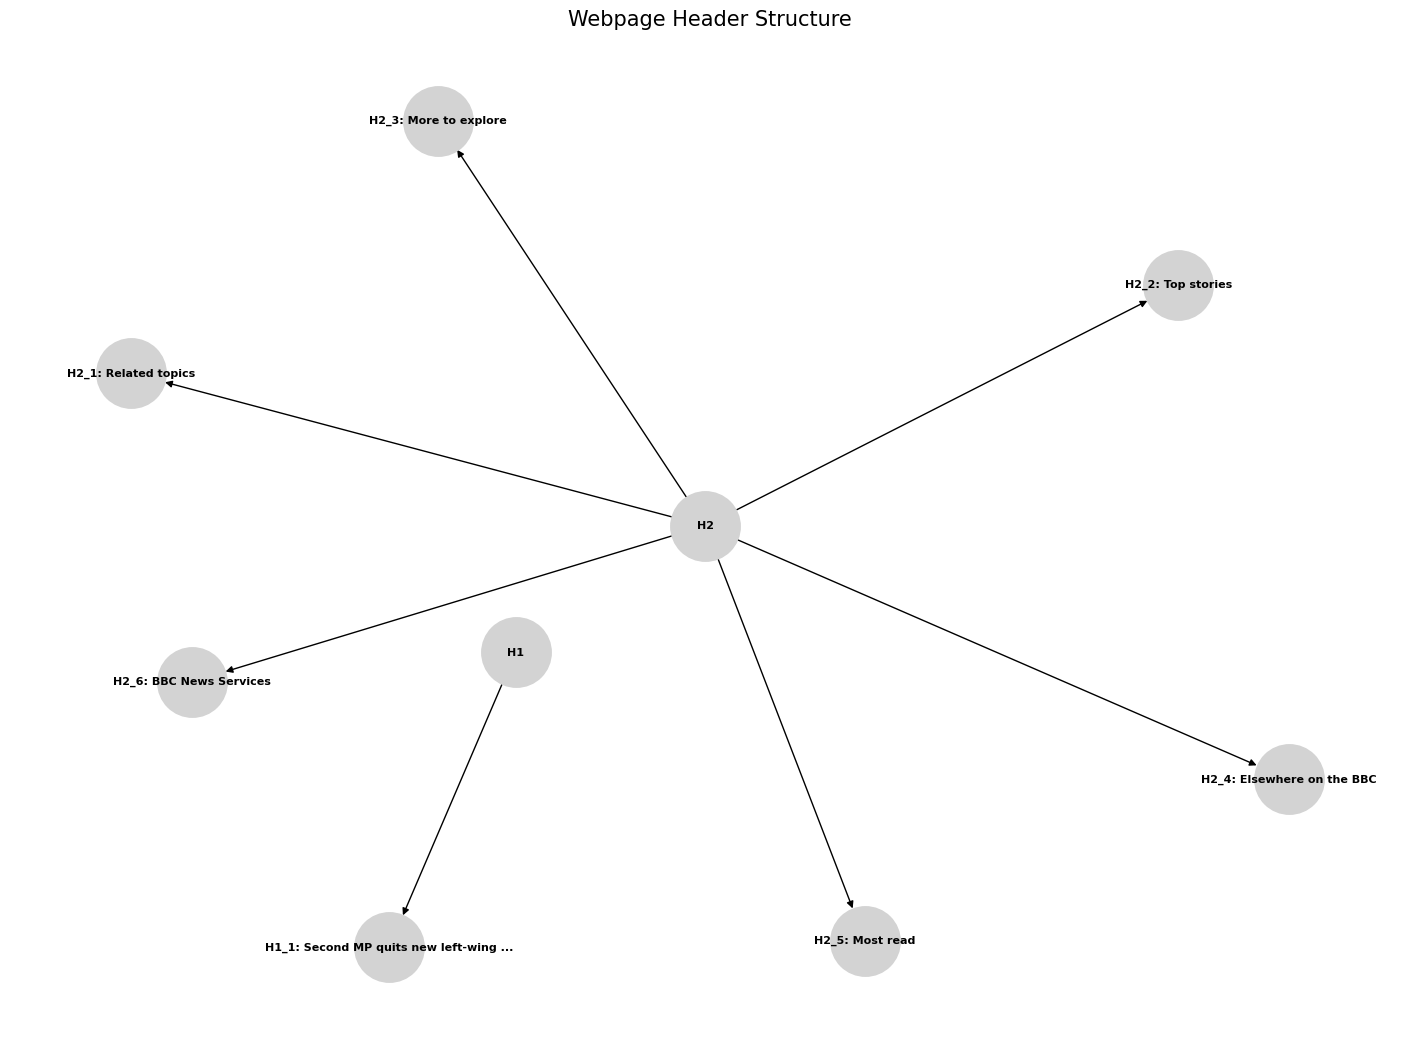

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

H_graph = nx.DiGraph()

# Add nodes for header levels
H_graph.add_nodes_from(headers.keys())

# Add header texts as nodes and connect them to their levels
for level, items in headers.items():
    for i, text in enumerate(items):
        header_node = f"{level}_{i+1}: {text[:30]}..." if len(text) > 30 else f"{level}_{i+1}: {text}"
        H_graph.add_node(header_node)
        H_graph.add_edge(level, header_node)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(H_graph, seed=42, k=0.8) # Adjust k for spacing
nx.draw(H_graph, pos, with_labels=True, node_size=2500, node_color="lightgray", font_size=8, font_weight="bold", arrows=True)
plt.title("Webpage Header Structure", size=15)
plt.show()

# **LIVE DEMO**

# **Webpage snippet (from BBC News)**

In [20]:
# any url i.e., https://www.bbc.co.uk/news

import requests

url = "https://www.bbc.co.uk/"  # any article URL
html = requests.get(url).text

# **Extract semantic data from the HTML**

In [21]:
from bs4 import BeautifulSoup
import json

soup = BeautifulSoup(html, "html.parser")
json_ld = soup.find("script", type="application/ld+json").string
data = json.loads(json_ld)

print("Extracted Semantic Data:")
print(json.dumps(data, indent=4))

Extracted Semantic Data:
{
    "@context": "http://schema.org",
    "@type": "CollectionPage",
    "name": "BBC - Home",
    "headline": "BBC - Home",
    "url": "https://www.bbc.co.uk/",
    "publisher": {
        "@type": "NewsMediaOrganization",
        "name": "BBC",
        "publishingPrinciples": "https://www.bbc.co.uk/news/help-41670342",
        "logo": {
            "@type": "ImageObject",
            "url": "https://static.files.bbci.co.uk/core/website/assets/static/bbc/images/metadata/poster-1024x576.efe9db7f43.png"
        }
    },
    "mainEntity": {
        "@type": "ItemList",
        "itemListElement": []
    }
}


# **Convert to a Semantic Network Graph**

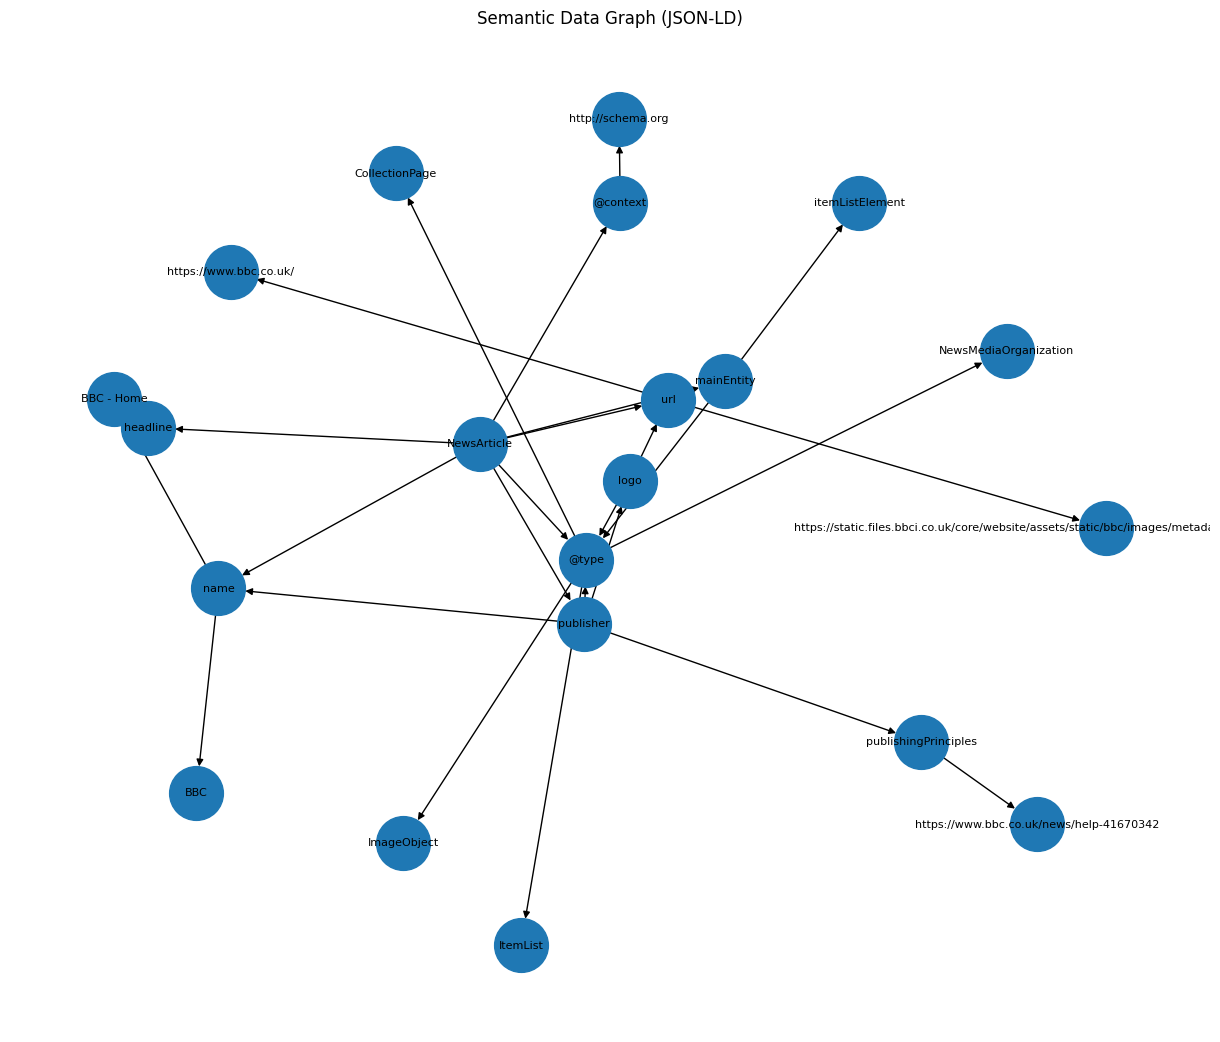

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

def add_edges(parent, obj):
    if isinstance(obj, dict):
        for k, v in obj.items():
            node = f"{k}"
            G.add_edge(parent, node)
            add_edges(node, v)
    elif isinstance(obj, list):
        for i, item in enumerate(obj):
            node = f"item_{i}"
            G.add_edge(parent, node)
            add_edges(node, item)
    else:
        G.add_edge(parent, str(obj))

root = "NewsArticle"
add_edges(root, data)

plt.figure(figsize=(12,10))
nx.draw(G, with_labels=True, node_size=1500, font_size=8)
plt.title("Semantic Data Graph (JSON-LD)") # Add a title for clarity
plt.savefig("semantic_data_graph.png") # Save the figure
plt.show()

In [26]:
display(data)

{'@context': 'http://schema.org',
 '@type': 'CollectionPage',
 'name': 'BBC - Home',
 'headline': 'BBC - Home',
 'url': 'https://www.bbc.co.uk/',
 'publisher': {'@type': 'NewsMediaOrganization',
  'name': 'BBC',
  'publishingPrinciples': 'https://www.bbc.co.uk/news/help-41670342',
  'logo': {'@type': 'ImageObject',
   'url': 'https://static.files.bbci.co.uk/core/website/assets/static/bbc/images/metadata/poster-1024x576.efe9db7f43.png'}},
 'mainEntity': {'@type': 'ItemList', 'itemListElement': []}}